<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/Programa_de_Haar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
import cv2 as cv



import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow # para visualizar imágenes
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

ruta = '/content/drive/Shareddrives/JPDP/2023_1/Vision/'


# Algoritmo de Viola-Jones

Se utiliza Haar features y un clasificador en cascada.

![características Haar](https://revistas.utp.ac.pa/index.php/id-tecnologico/article/download/21/html/1030)

Se basa en un clasificador binario débil para determinar si una región de la imagen contiene un objeto de interés o no.

Se combinan los clasificadores débiles en un clasificador en cascada.

![clasificador en cascada](https://www.researchgate.net/profile/Moises-Garcia-8/publication/252627644/figure/fig3/AS:393154680377350@1470746788414/Figura-4-Diagrama-de-la-deteccion-en-cascada-Una-serie-de-clasificadores-o-filtros-es.png)

Si un clasificador binario determina que una región de la imagen no contiene el objeto de interés, la región se descarta y se pasa a la siguiente etapa.

Si un clasificador binario determina que una región de la imagen puede contener el objeto de interés, se pasa a la siguiente etapa del clasificador en cascada.

Al final, las regiones que se detectan como objetos de interés hansido detectadas en todas las etapas del clasificador en cascada.


# Características Haar

Las características de Haar son funciones rectangulares simples de 2 dimensiones en las que se varía el tamaño y la posición de recuadros blancos y negros.

Las características se extraen calculando la diferencia entre la suma de los píxeles dentro del recuadro negro y la suma de los píxeles bajo el rectángulo blanco.

![](https://carlosjuliopardoblog.files.wordpress.com/2017/05/filtrosconvolucion.jpg)



Para utilizar la técnica, se calculan las características a distintas escalas
![](https://carlosjuliopardoblog.files.wordpress.com/2017/05/diagrama-en-blanco-3.jpeg?w=1024)

# Haar cascade para detectar personas

Se utilizará, en este caso, una concatenación de clasificadores débiles para conformar uno más robusto. El clasificador Haar de personas está configuradoen un archivo XML que describe cómo detectar objetos en una imagen disponible en la página oficial de OpenCV. Puede consultar más información en [Haar en githujb](https://github.com/opencv/opencv/blob/master/data/haarcascades/)

In [ ]:
# carga el clasificador
clasificador = cv.CascadeClassifier(ruta + 'haarcascade_frontalface_alt_tree.xml')



In [ ]:
clasificador.

< cv2.CascadeClassifier 0x7960367af6b0>

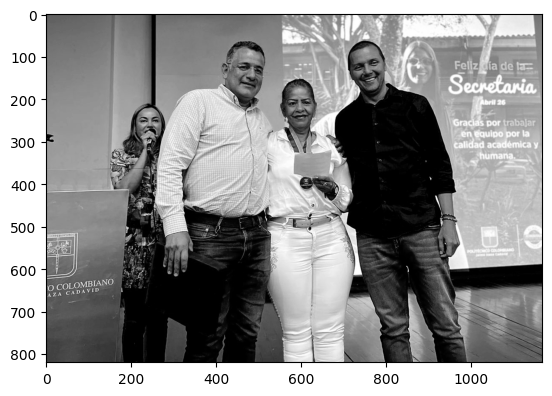

In [ ]:
fname = ruta + 'persona03.jpg'
img = cv.cvtColor(io.imread(fname), cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [ ]:
clasificador.detectMultiScale()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - CascadeClassifier.detectMultiScale() missing required argument 'image' (pos 1)
>  - CascadeClassifier.detectMultiScale() missing required argument 'image' (pos 1)


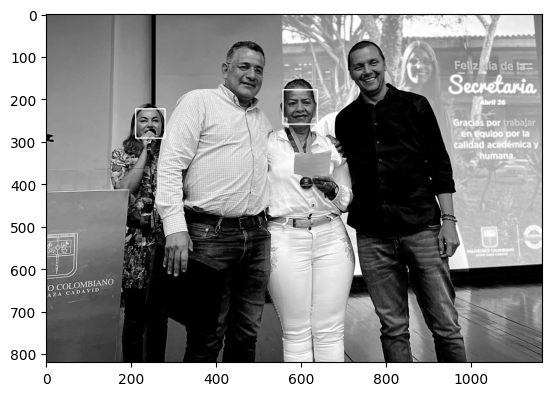

In [ ]:
# detecta personas en la imagen
faces = clasificador.detectMultiScale(img,1.01, 70)

# dibuja rectángulos alrededor de las personas detectadas
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)

# muestra la imagen con las personas detectadas
plt.imshow(img,cmap='gray')

In [ ]:
faces

In [ ]:
from sklearn import tree
tree.plot_tree(clasificador);
